<a href="https://colab.research.google.com/github/GaoIzoo/AI-DEPLOYMENT/blob/main/Pr%C3%A9diction_du_cancer_du_sein_par_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prédiction du cancer du  sein par machine learning

À propos de l'ensemble de données

Les caractéristiques sont calculées à partir d'une image numérisée d'une aspiration à l'aiguille fine (FNA) d'une masse mammaire. Elles décrivent les caractéristiques des noyaux cellulaires présents dans l'image.
n l'espace tridimensionnel est celui décrit dans : [K. P. Bennett et O. L. Mangasarian : "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Cette base de données est également disponible sur le site:
ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Également disponible sur le dépôt d'apprentissage automatique de l'UCI : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informations sur les variables :

1) Numéro d'identification
2) Diagnostic (M = malin, B = bénin)
3-32)

Dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire :

a) le rayon (moyenne des distances entre le centre et les points du périmètre)
b) texture (écart-type des valeurs de l'échelle de gris)
c) périmètre
d) surface
e) régularité (variation locale des longueurs de rayon)
f) compacité (périmètre^2 / surface - 1,0)
g) concavité (sévérité des parties concaves du contour)
h) points concaves (nombre de portions concaves du contour)
i) la symétrie
j) dimension fractale ("approximation du trait de côte" - 1)

La moyenne, l'erreur standard ou la plus grande (moyenne des trois plus grandes valeurs) de ces caractéristiques ont été calculées.
plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image,
ce qui donne 30 caractéristiques. Par exemple, le champ 3 est le Rayon moyen, le champ 13 est le rayon SE, le champ 23 est le rayon le plus mauvais.

Toutes les valeurs des caractéristiques sont recodées avec quatre chiffres significatifs.

Valeurs d'attributs manquantes : aucune

Distribution des classes : 357 bénignes, 212 malignes

Traduit avec www.DeepL.com/Translator (version gratuite)

# 2. Importation des packages

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

import warnings
warnings.filterwarnings("ignore") 

#Pour la construction des différents modèles de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xg

# 3. Exploration de la base de donnée

**3.1) Importation de la base**

In [5]:
# importation de la base data.csv
import pandas as pd
df = pd.read_csv ('/content/data.csv',  sep=',')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print("La base de données sur le cancer comprend ", df.shape)

La base de données sur le cancer comprend  (569, 33)


**Suppression de la variable unnamed 32 qui ne comporte que des variables manquantes**

In [7]:
# suppression de la colonne "id" et "Unnamed: 32"
df = df.drop(df.columns[[0,32]], axis=1)
df.head(30)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


**3.2) Analysons la variable à expliquer (Diagnostic)**

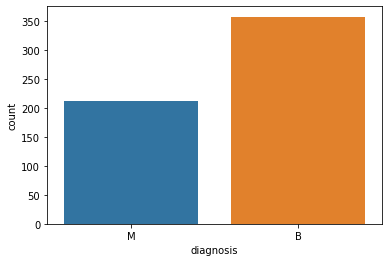

In [8]:
sns.countplot(df['diagnosis'],label="Count")

In [9]:
# nombre total de cancéreuse et non cancéreuse
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

On a un nombre plus élévé de cancer de sein benigne que maligne, soit environ 62,7 % et 37,3% de maligne

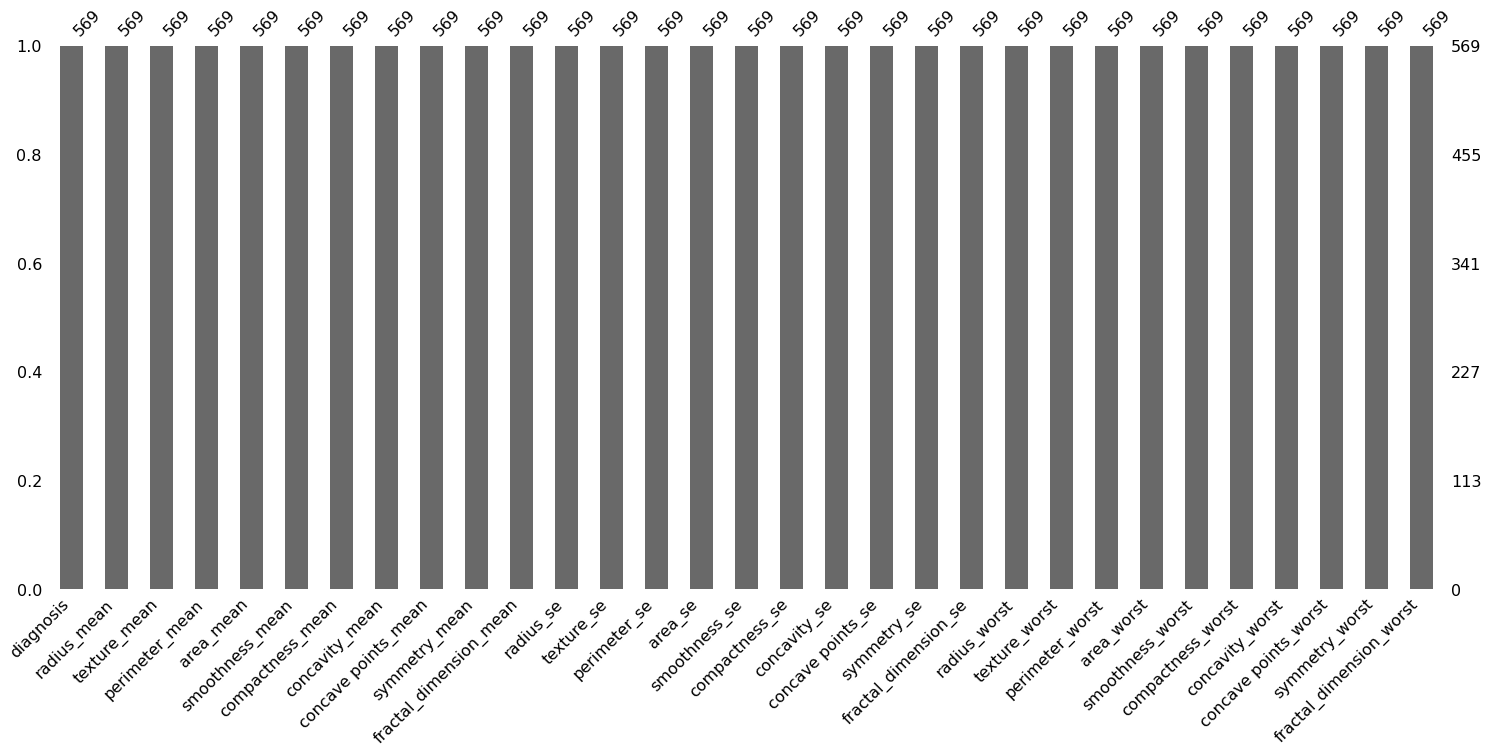

In [10]:
# Valeurs manquantes

df.isna().sum()
msno.bar(df)

Nous n'avons pas de valeurs manquantes dans notre base de données

**3.3 Etude la correlation entre les différentes variables**

Transformation de la variable cible en variable quantitative

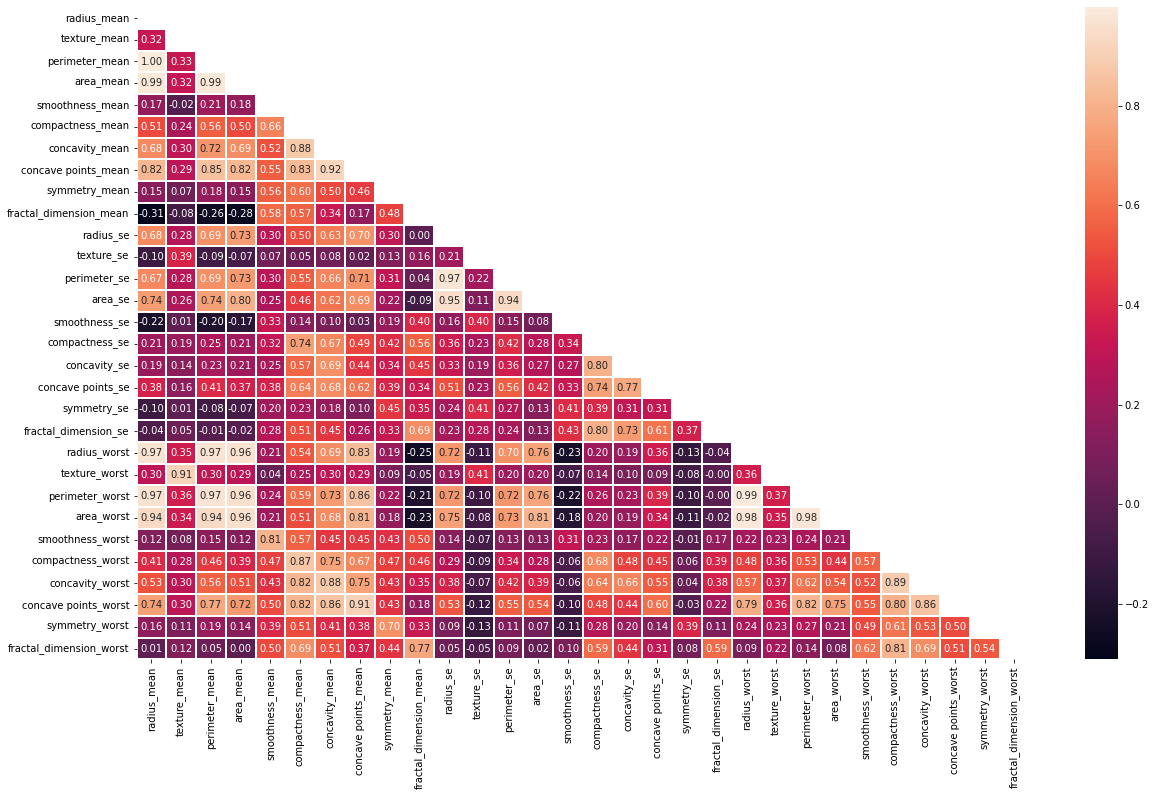

In [11]:
# Graphique de correlation

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

Nous pouvons voir qu'il y a beaucoup de colonnes qui sont très fortement corrélées, ce qui provoque la multicollinéarité. Nous devons donc éliminer les caractéristiques fortement corrélées.

In [12]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.6)]

df = df.drop(to_drop, axis = 1)

print(f"La base de données a été reduit à {df.shape[1]} columns.")

La base de données a été reduit à 9 columns.


In [13]:
df.head()

,diagnosis,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.9053,0.006399,0.03003,0.006193,17.33,0.2654,0.4601,0.11890
1,M,0.7339,0.005225,0.01389,0.003532,23.41,0.1860,0.2750,0.08902
2,M,0.7869,0.006150,0.02250,0.004571,25.53,0.2430,0.3613,0.08758
3,M,1.1560,0.009110,0.05963,0.009208,26.50,0.2575,0.6638,0.17300
4,M,0.7813,0.011490,0.01756,0.005115,16.67,0.1625,0.2364,0.07678


In [14]:
# remplaçons M ( cancer maligne ) par 1 et B ( cancer benigne ) par 0 sur la colonne "diagnosis"
df.diagnosis = df.diagnosis.replace({"M":1,"B":0})
df.head()

,diagnosis,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.9053,0.006399,0.03003,0.006193,17.33,0.2654,0.4601,0.11890
1,1,0.7339,0.005225,0.01389,0.003532,23.41,0.1860,0.2750,0.08902
2,1,0.7869,0.006150,0.02250,0.004571,25.53,0.2430,0.3613,0.08758
3,1,1.1560,0.009110,0.05963,0.009208,26.50,0.2575,0.6638,0.17300
4,1,0.7813,0.011490,0.01756,0.005115,16.67,0.1625,0.2364,0.07678


In [15]:
df.to_csv()

',diagnosis,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n0,1,0.9053,0.006399,0.03003,0.006193,17.33,0.2654,0.4601,0.1189\n1,1,0.7339,0.005225,0.01389,0.003532,23.41,0.186,0.275,0.08902\n2,1,0.7869,0.00615,0.0225,0.004571,25.53,0.243,0.3613,0.08758\n3,1,1.156,0.00911,0.05963,0.009208,26.5,0.2575,0.6638,0.173\n4,1,0.7813,0.01149,0.01756,0.005115,16.67,0.1625,0.2364,0.07678\n5,1,0.8902,0.00751,0.02165,0.005082,23.75,0.1741,0.3985,0.1244\n6,1,0.7732,0.004314,0.01369,0.002179,27.66,0.1932,0.3063,0.08368\n7,1,1.377,0.008805,0.01486,0.005412,28.14,0.1556,0.3196,0.1151\n8,1,1.002,0.005731,0.02143,0.003749,30.73,0.206,0.4378,0.1072\n9,1,1.599,0.007149,0.01789,0.01008,40.68,0.221,0.4366,0.2075\n10,1,1.187,0.004029,0.0146,0.003042,33.88,0.09975,0.2948,0.08452\n11,1,0.9849,0.005771,0.02008,0.004144,27.28,0.181,0.3792,0.1048\n12,1,3.568,0.003139,0.04484,0.01284,29.94,0.1767,0.3176,0.1023\n13,1,1.078,0.009769,0.0

Nous ne garderons que 

# 4. Implémentation des différents modèles de ML

**4.1 Subdivision de la base de données en données d'apprentissage et test**

Divsion en 70 % de données d'apprentissage et 20 % de test

In [16]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [17]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**4.2) Normalisation de nos données**

Nous remarquons une très grande variabilté en nos variables. Nous allons proceder à la normalisation de nos données de test.

In [18]:
# scaling data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

**4.3) Implémentation**

4.3.1) Regression Logistique

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[103   5]
 [  8  55]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [21]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9239766081871345


4.3.2) Support Vector Classifier (SVC)

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [23]:
grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [24]:
grid_search.best_score_

0.9447784810126582

In [25]:
svc = SVC(C = 15, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01)

In [26]:
y_pred = svc.predict(X_test)

In [27]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.957286432160804
0.9239766081871345


In [28]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[103   5]
 [  8  55]]


In [29]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



4.3.3)  ANN (neural network )

In [30]:
np.random.seed(42)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Training the ANN on the training set

ann.fit(X_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.4824
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6859
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7412
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7563
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7940
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8317
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8417
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8568
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8668
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8744
Epoch 11/

In [31]:
# Predicting the test set results

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

In [32]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[104   4]
 [ 14  49]]


In [33]:
# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)

Accuracy
0.8947368421052632


4.3.4) Les forêts aléatoires (Random Forests)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [35]:
y_pred = rand_clf.predict(X_test)

In [36]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9899497487437185
0.9298245614035088


In [37]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[103   5]
 [  7  56]]


4.3.5) Support vector Machine 

In [38]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions3 = svc_model.predict(X_test)

In [39]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions3))
print("\n")
print(classification_report(y_test, predictions3))

Confusion Matrix: 
 [[103   5]
 [ 10  53]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [40]:
svm_acc = accuracy_score(y_test, predictions3)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9122807017543859


# 5. Benchmark des différents modèles

5.1 Visualisation de différents resultats

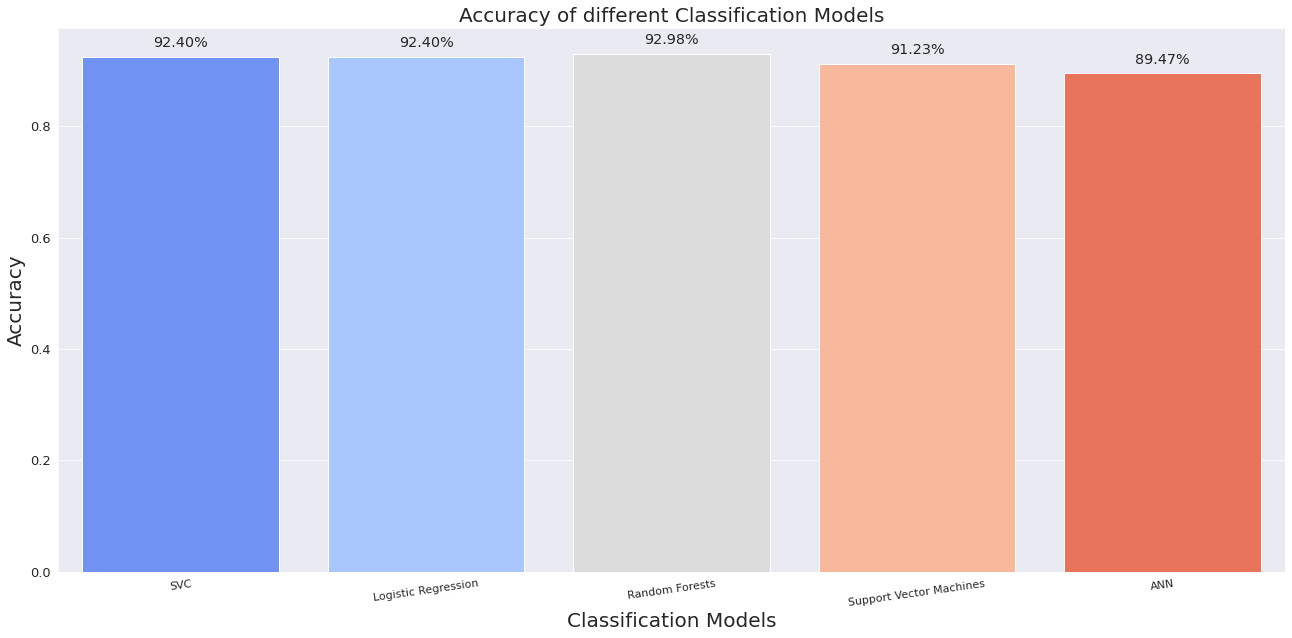

In [41]:
mylist=[]
mylist2=[]
mylist.append(svc_acc)
mylist2.append("SVC")
mylist.append(svc_acc)
mylist2.append("SVC")
mylist.append(logreg_acc)
mylist2.append("Logistic Regression")
mylist.append(ran_clf_acc)
mylist2.append("Random Forests")
mylist.append(svm_acc)
mylist2.append("Support Vector Machines")
mylist.append(ac_ann)
mylist2.append("ANN")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Le meilleur modèle  en terme d'accuracy est le SVC

**Testons les performances du SVC**

# Sauvegarde et importation de notre modèle

In [42]:
import pickle

**Enregistrer mon modèle**

In [43]:
df.head()

,diagnosis,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.9053,0.006399,0.03003,0.006193,17.33,0.2654,0.4601,0.11890
1,1,0.7339,0.005225,0.01389,0.003532,23.41,0.1860,0.2750,0.08902
2,1,0.7869,0.006150,0.02250,0.004571,25.53,0.2430,0.3613,0.08758
3,1,1.1560,0.009110,0.05963,0.009208,26.50,0.2575,0.6638,0.17300
4,1,0.7813,0.011490,0.01756,0.005115,16.67,0.1625,0.2364,0.07678


In [44]:
filename = 'trained_model.sav'
pickle.dump(svc, open(filename, 'wb'))

In [45]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [46]:
input_data = (0.7452,1003,0.1,0.002897,23.87,0.22,0.2908,0.07277)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('La personne a un cancer benigne')
else:
  print('La personne a un cancer maligne')


[1]
La personne a un cancer maligne
